<a href="https://colab.research.google.com/github/neerajvashistha/AI-and-ML./blob/master/Unit5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Decision Tree Classifier on IRIS dataset
from sklearn.datasets import load_iris
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import cross_val_score
from IPython.display import Image, display
import pydotplus
import numpy as np

# For reproducibility
np.random.seed(1000)

nb_samples = 500

In [0]:
#load data
iris = load_iris()

In [0]:
# Create a Decision tree classifier
dt = DecisionTreeClassifier()

dt_scores = cross_val_score(dt, iris.data, iris.target, scoring='accuracy', cv=10)
print('Decision tree score: %.3f' % dt_scores.mean())

Decision tree score: 0.960


In [0]:
dt.fit(iris.data, iris.target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [0]:
# Save in Graphviz format
dot_data = export_graphviz(dt, out_file=None,
                                feature_names=iris.feature_names,
                                class_names=iris.target_names,
                                filled=True, rounded=True)

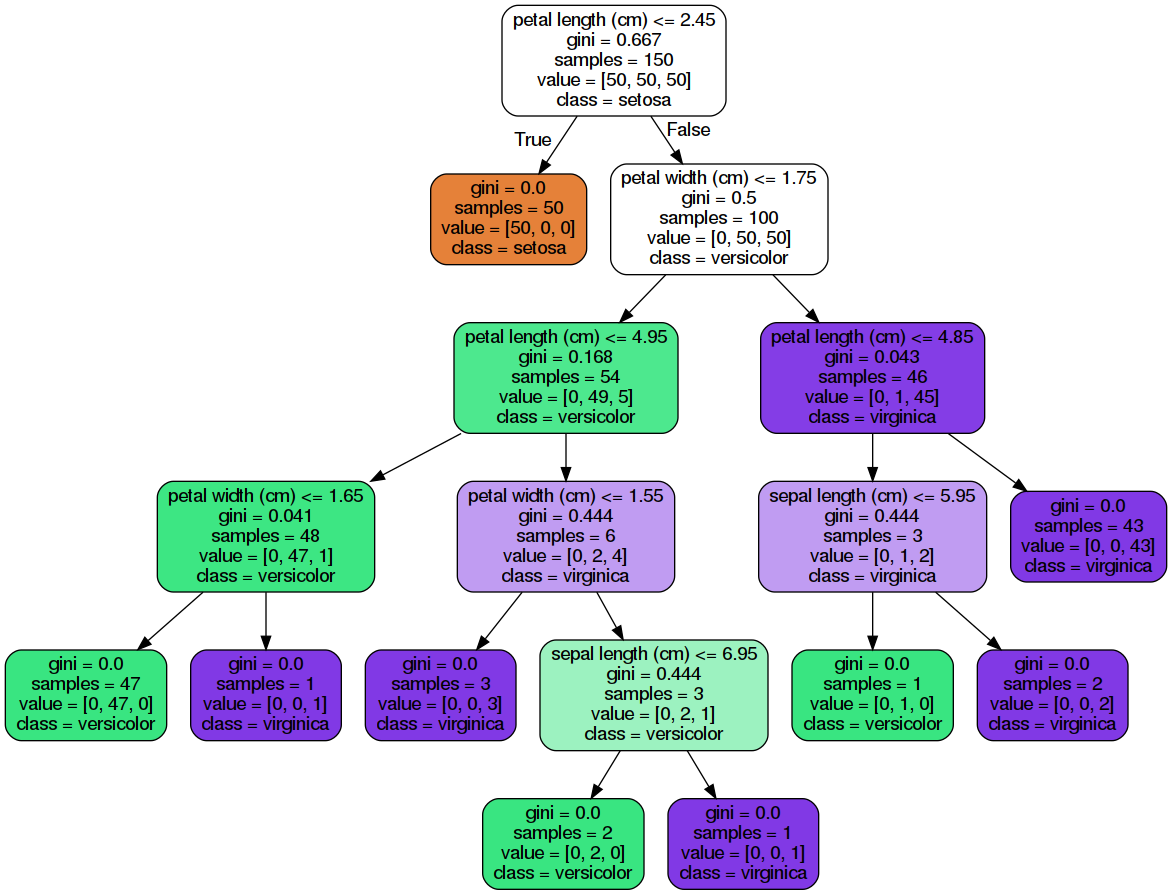

In [0]:
graph = pydotplus.graph_from_dot_data(dot_data)
display(Image(data=graph.create_png()))

In [0]:
dt.feature_importances_

array([0.02666667, 0.        , 0.55072262, 0.42261071])

In [0]:
np.argsort(dt.feature_importances_)

array([1, 0, 3, 2])

In [0]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
plt.bar(np.argsort(dt.feature_importances_), dt.feature_importances_)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

<Figure size 640x480 with 1 Axes>

In [0]:
print(cross_val_score(DecisionTreeClassifier(), iris.data, iris.target, scoring='accuracy', cv=10).mean())

print(cross_val_score(DecisionTreeClassifier(max_features='auto'), iris.data, iris.target, scoring='accuracy', cv=10).mean())

print(cross_val_score(DecisionTreeClassifier(min_samples_split=100), iris.data, iris.target, scoring='accuracy', cv=10).mean())

0.9533333333333334
0.9466666666666667
0.6666666666666667


In [0]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(iris.data, iris.target)
cross_val_score(lr, iris.data, iris.target, scoring='accuracy', cv=10).mean()

0.9533333333333334

In [0]:
# Compute ROC Curve
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
y = label_binarize(iris.target, classes=[0, 1, 2])
n_classes = y.shape[1]

fpr_dt = dict()
tpr_dt = dict()
roc_auc_dt = dict()
fpr_lr = dict()
tpr_lr = dict()
roc_auc_lr = dict()

Y_dt_score = dt.predict_proba(iris.data)
Y_lr_score = lr.decision_function(iris.data)

for i in range(n_classes):
    fpr_dt[i], tpr_dt[i], _ = roc_curve(y[:, i], Y_dt_score[:, i])
    roc_auc_dt[i] = auc(fpr_dt[i], tpr_dt[i])
    fpr_lr[i], tpr_lr[i], _ = roc_curve(y[:, i], Y_dt_score[:, i])
    roc_auc_lr[i] = auc(fpr_lr[i], tpr_lr[i])



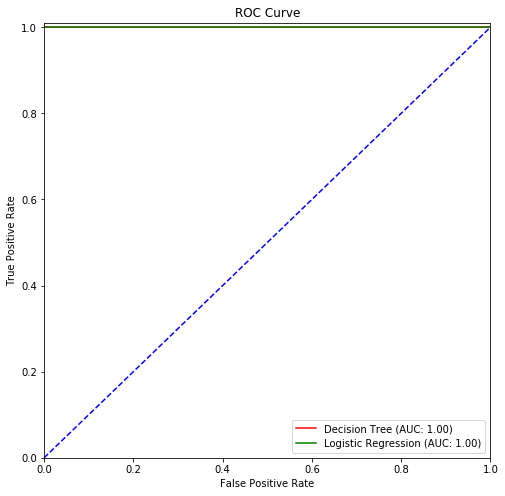

In [0]:
# Plot ROC Curve
plt.figure(figsize=(8, 8))

plt.plot(fpr_dt[2], tpr_dt[2], color='red', label='Decision Tree (AUC: %.2f)' % auc(fpr_dt[2], tpr_dt[2]))
plt.plot(fpr_lr[2], tpr_lr[2], color='green', label='Logistic Regression (AUC: %.2f)' % auc(fpr_lr[2], tpr_lr[2]))
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")

plt.show()

In [0]:
#Decision Tree Classifier on MINST dataset
import numpy as np
import multiprocessing

from sklearn.datasets import load_digits
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV


# For reproducibility
np.random.seed(1000)

In [0]:
# Load dataset
digits = load_digits()

In [0]:
# Define a param grid
param_grid = [
    {
        'criterion': ['gini', 'entropy'],
        'max_features': ['auto', 'log2', None],
        'min_samples_split': [2, 10, 25, 100, 200],
        'max_depth': [5, 10, 15, None]
    }
]

In [0]:
# Create and train a grid searh
gs = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid,
                  scoring='accuracy', cv=10, n_jobs=multiprocessing.cpu_count())
gs.fit(digits.data, digits.target)

print(gs.best_estimator_)
print('Decision tree score: %.3f' % gs.best_score_)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Decision tree score: 0.835


In [0]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score


# For reproducibility
np.random.seed(1000)

nb_classifications = 100

In [0]:
# Load dataset
digits = load_digits()

In [0]:
# Collect accuracies
rf_accuracy = []

for i in range(1, nb_classifications):
    a = cross_val_score(RandomForestClassifier(n_estimators=i), digits.data, digits.target, scoring='accuracy',
                        cv=10).mean()
    rf_accuracy.append(a)

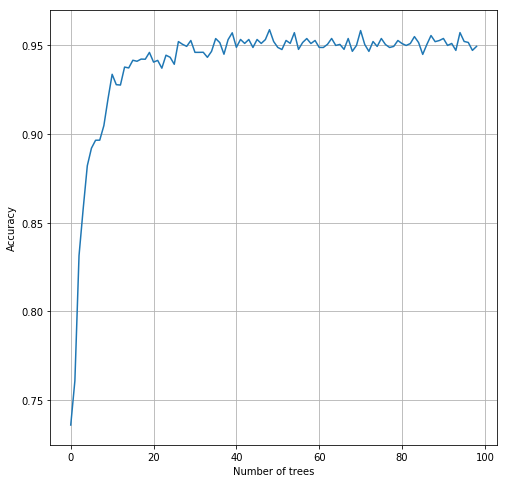

In [0]:
# Show results
plt.figure(figsize=(8, 8))
plt.xlabel('Number of trees')
plt.ylabel('Accuracy')
plt.grid(True)
plt.plot(rf_accuracy)
plt.show()

In [0]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
# Collect accuracies
rf_accuracy = []
et_accuracy = []

for i in range(1, nb_classifications):
    a = cross_val_score(RandomForestClassifier(n_estimators=i), digits.data, digits.target, scoring='accuracy',
                        cv=10).mean()
    rf_accuracy.append(a)

    b = cross_val_score(ExtraTreesClassifier(n_estimators=i), digits.data, digits.target, scoring='accuracy',
                        cv=10).mean()
    et_accuracy.append(b)

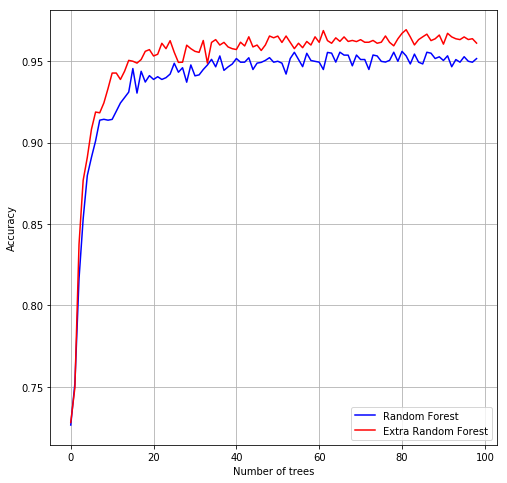

In [0]:
# Show results
plt.figure(figsize=(8, 8))
plt.xlabel('Number of trees')
plt.ylabel('Accuracy')
plt.grid(True)
plt.plot(rf_accuracy, color='blue', label='Random Forest')
plt.plot(et_accuracy, color='red', label='Extra Random Forest')
plt.legend(loc="lower right")
plt.show()

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

# For reproducibility
np.random.seed(1000)

nb_samples = 1000

In [0]:
#Create dataset
X, Y = make_classification(n_samples=nb_samples, n_features=50,
                           n_informative=30, n_redundant=20, n_classes=2, n_clusters_per_class=5)


In [0]:
rf = RandomForestClassifier() 
## Fit the model on your training data.
rf.fit(X, Y) 
rf.score(X,Y)

0.995

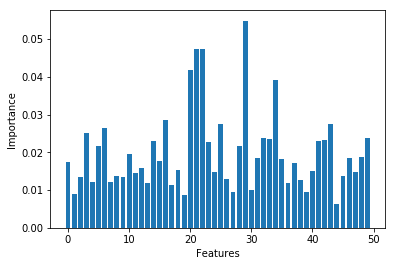

In [0]:
fig, ax = plt.subplots()
plt.bar(np.argsort(rf.feature_importances_), rf.feature_importances_)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

In [0]:
#Adaboost
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score


# For reproducibility
np.random.seed(1000)
nb_classifications = 100

In [0]:
# Load dataset
digits = load_digits()
# Collect accuracies
ab_accuracy = []

In [0]:
for i in range(1, nb_classifications):
    a = cross_val_score(AdaBoostClassifier(n_estimators=i), digits.data, digits.target, 
                        scoring='accuracy',cv=10).mean()
    ab_accuracy.append(a)

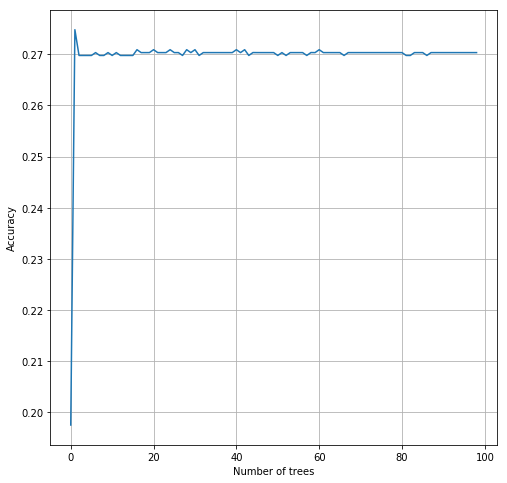

In [0]:
# Show results
plt.figure(figsize=(8, 8))
plt.xlabel('Number of trees')
plt.ylabel('Accuracy')
plt.grid(True)
plt.plot(ab_accuracy)
plt.show()

In [0]:
import numpy as np

from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score


# For reproducibility
np.random.seed(1000)

In [0]:
# Load dataset
iris = load_iris()
ab_accuracy = []
# Create and train an AdaBoost classifier
for i in range(1, nb_classifications):
    ada = AdaBoostClassifier(n_estimators=i, learning_rate=1.0)
    ab_accuracy.append(cross_val_score(ada, iris.data, iris.target, scoring='accuracy', cv=10).mean())
print('AdaBoost score: %.3f' % np.asarray(ab_accuracy).mean())

AdaBoost score: 0.946


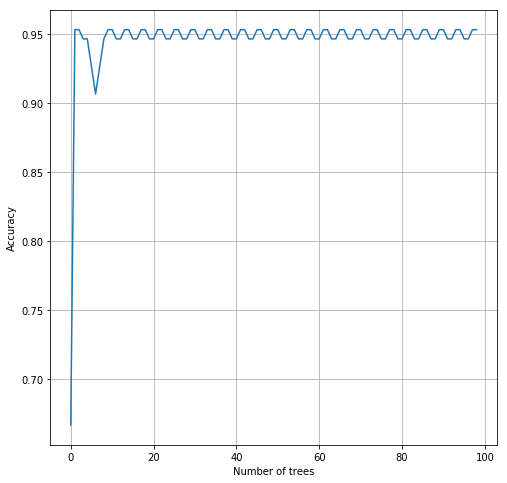

In [0]:
# Show results
plt.figure(figsize=(8, 8))
plt.xlabel('Number of trees')
plt.ylabel('Accuracy')
plt.grid(True)
plt.plot(ab_accuracy)
plt.show()

In [0]:
#Gradient Tree Boosting

In [0]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

# For reproducibility
np.random.seed(1000)

nb_samples = 500

In [0]:
# Create the dataset
X, Y = make_classification(n_samples=nb_samples, n_features=4, n_informative=3, n_redundant=1, n_classes=3)

In [0]:
# Collect the scores for n_estimators in (1, 50)
a = []
max_estimators = 50

for i in range(1, max_estimators):
    score = cross_val_score(GradientBoostingClassifier(n_estimators=i, learning_rate=10.0 / float(i)), 
                            X, Y, cv=10, scoring='accuracy').mean()
    a.append(score)

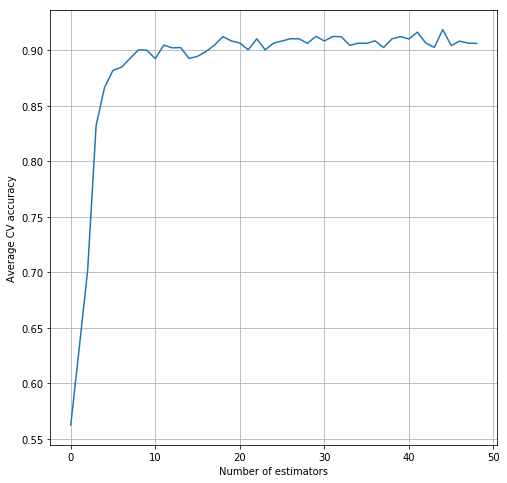

In [0]:
# Plot the results
plt.figure(figsize=(8, 8))
plt.xlabel('Number of estimators')
plt.ylabel('Average CV accuracy')
plt.grid(True)
plt.plot(a)
plt.show()

In [0]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

# For reproducibility
np.random.seed(1000)

nb_samples = 500

In [0]:
def compute_accuracies(lr, dt, svc, vc, X, Y):
    accuracies = []

    accuracies.append(cross_val_score(lr, X, Y, scoring='accuracy', cv=10).mean())
    accuracies.append(cross_val_score(dt, X, Y, scoring='accuracy', cv=10).mean())
    accuracies.append(cross_val_score(svc, X, Y, scoring='accuracy', cv=10).mean())
    accuracies.append(cross_val_score(vc, X, Y, scoring='accuracy', cv=10).mean())

    print('Accuracies:')
    print(np.array(accuracies))

    return accuracies

In [0]:
def plot_accuracies(accuracies):
    fig, ax = plt.subplots(figsize=(12, 8))
    positions = np.array([0, 1, 2, 3])

    ax.bar(positions, accuracies, 0.5)
    ax.set_ylabel('Accuracy')
    ax.set_xticklabels(('Logistic Regression', 'Decision Tree', 'SVM', 'Ensemble'))
    ax.set_xticks(positions + (5.0 / 20))
    plt.ylim([0.80, 0.93])
    plt.show()

In [0]:
# Create the dataset
X, Y = make_classification(n_samples=nb_samples, n_features=2, n_redundant=0, n_classes=2)

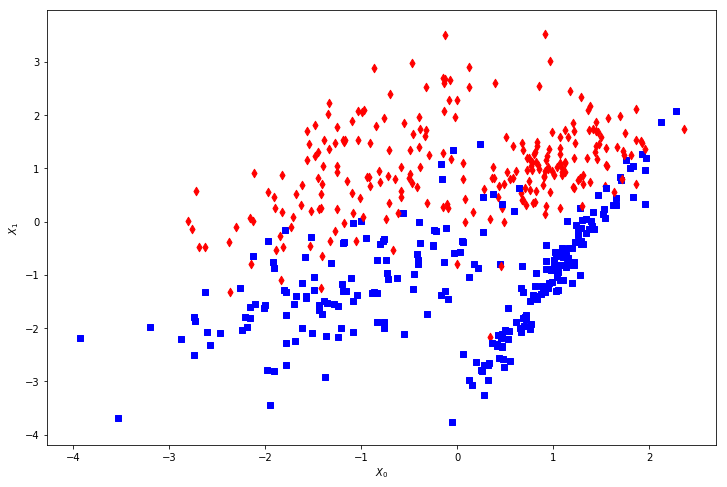

In [0]:
# Show the dataset
fig, ax = plt.subplots(figsize=(12, 8))
for i, x in enumerate(X):
    if Y[i] == 0:
        ax.scatter(x[0], x[1], marker='s', color='blue')
    else:
        ax.scatter(x[0], x[1], marker='d', color='red')

ax.set_xlabel(r'$X_0$')
ax.set_ylabel(r'$X_1$')
plt.show()

In [0]:
# Create the classifiers
lr = LogisticRegression()
svc = SVC(kernel='poly', probability=True)
dt = DecisionTreeClassifier()

classifiers = [('lr', lr),
               ('dt', dt),
               ('svc', svc)]
# Hard voting
vc = VotingClassifier(estimators=classifiers, voting='hard')

/home/projects/virt-py/local/lib/python2.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/projects/virt-py/local/lib/python2.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/projects/virt-py/local/lib/python2.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/projects/virt-py/local/lib/python2.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth valu

Accuracies:
[0.90182873 0.84990876 0.87386955 0.89982873]


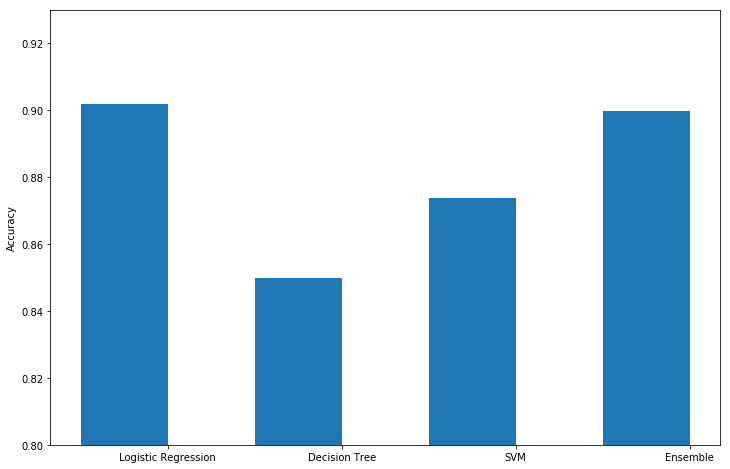

In [0]:
# Compute and plot accuracies
hard_accuracies = compute_accuracies(lr, dt, svc, vc, X, Y)
plot_accuracies(hard_accuracies)

In [0]:
# Soft weighted voting
weights = [1.5, 0.5, 0.75]

vc = VotingClassifier(estimators=classifiers, weights=weights, voting='soft')

/home/projects/virt-py/local/lib/python2.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/projects/virt-py/local/lib/python2.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/projects/virt-py/local/lib/python2.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/projects/virt-py/local/lib/python2.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth valu

Accuracies:
[0.90182873 0.86782873 0.87386955 0.89578952]


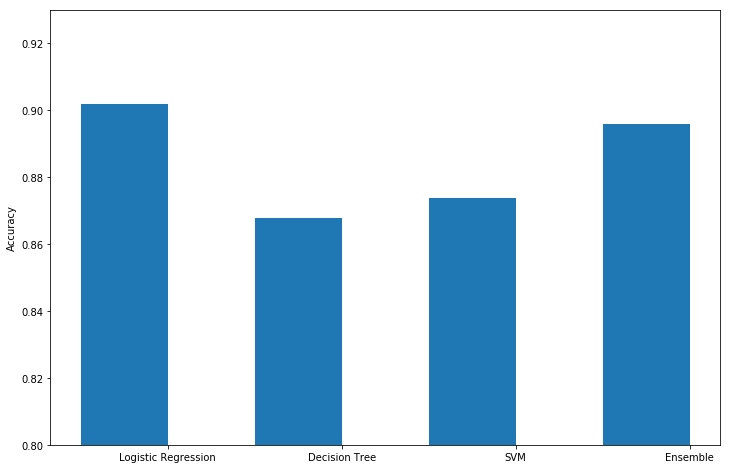

In [0]:
# Compute and plot accuracies
soft_accuracies = compute_accuracies(lr, dt, svc, vc, X, Y)
plot_accuracies(soft_accuracies)